In [1]:
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Premiers pas avec le fichier

Le fichier est trop volumineux pour pouvoir le stocker sur le github. C'est pourquoi nous opérons quelques modifications.

In [ ]:
df = pd.read_csv('/Users/augustincablant/Desktop/data.csv')
df.head()

In [3]:
df.shape

(1322601, 38)

In [4]:
df.columns

Index(['ID', 'Country', 'VFN', 'Mp', 'Mh', 'Man', 'MMS', 'Tan', 'T', 'Va',
       'Ve', 'Mk', 'Cn', 'Ct', 'Cr', 'r', 'm (kg)', 'Mt', 'Enedc (g/km)',
       'Ewltp (g/km)', 'W (mm)', 'At1 (mm)', 'At2 (mm)', 'Ft', 'Fm',
       'ec (cm3)', 'ep (KW)', 'z (Wh/km)', 'IT', 'Ernedc (g/km)',
       'Erwltp (g/km)', 'De', 'Vf', 'Status', 'year', 'Date of registration',
       'Fuel consumption ', 'Electric range (km)'],
      dtype='object')

In [27]:
# On conserve que la France 

df_fr = df[df['Country']=='FR']
df_fr.shape

(214432, 38)

In [28]:
# On opère à une sélection des colonnes 
colonnes_utiles = ['Mp','m (kg)', 'Ft', 'ep (KW)', 'z (Wh/km)','Status', 'year', 'Fuel consumption ', 'Electric range (km)']
df_fr = df_fr[colonnes_utiles]
df_fr.shape

(214432, 9)

In [29]:
df_fr.to_csv('/Users/augustincablant/Documents/GitHub/Pycar/DOWNLOAD/voitures_fr.csv')

Fin de la procédure.

# Passons à l'analyse du fichier 

In [3]:
os.chdir("/Users/augustincablant/Documents/GitHub/Pycar")
df = pd.read_csv('DOWNLOAD/voitures_fr.csv')
df.drop('Unnamed: 0', axis=1, inplace = True)

In [4]:
df.sample(10)

,Mp,m (kg),Ft,ep (KW),z (Wh/km),Status,year,Fuel consumption,Electric range (km)
48131,FORD,2257.0,ELECTRIC,124.0,187.0,P,2022,NaN,540.0
10953,STELLANTIS,1530.0,ELECTRIC,57.0,155.0,P,2022,NaN,362.0
21058,STELLANTIS,1623.0,ELECTRIC,100.0,161.0,P,2022,NaN,330.0
188443,RENAULT-NISSAN-MITSUBISHI,1577.0,ELECTRIC,51.0,175.0,P,2022,NaN,390.0
140902,TESLA-HONDA-JLR,1835.0,ELECTRIC,88.0,144.0,P,2022,NaN,491.0
210462,MERCEDES-BENZ,2045.0,ELECTRIC,95.0,157.0,P,2022,NaN,521.0
164125,NaN,1695.0,ELECTRIC,115.0,178.0,P,2022,NaN,440.0
142644,TESLA-HONDA-JLR,1835.0,ELECTRIC,88.0,144.0,P,2022,NaN,491.0
201550,RENAULT-NISSAN-MITSUBISHI,1201.0,ELECTRIC,31.0,161.0,P,2022,NaN,188.0
5041,STELLANTIS,1530.0,ELECTRIC,57.0,155.0,P,2022,NaN,362.0


In [5]:
list(df.columns)

['Mp',
 'm (kg)',
 'Ft',
 'ep (KW)',
 'z (Wh/km)',
 'Status',
 'year',
 'Fuel consumption ',
 'Electric range (km)']

In [34]:
list(df['Ft'].unique())

['ELECTRIC', 'PETROL/ELECTRIC', 'DIESEL/ELECTRIC', 'HYDROGEN']

In [36]:
list(df['Mp'].unique())

['RENAULT-NISSAN-MITSUBISHI',
 'STELLANTIS',
 'VOLKSWAGEN',
 'TESLA-HONDA-JLR',
 nan,
 'MAZDA-SUBARU-SUZUKI-TOYOTA',
 'BMW',
 'FORD',
 'MERCEDES-BENZ',
 'HYUNDAI MOTOR EUROPE',
 'KIA']

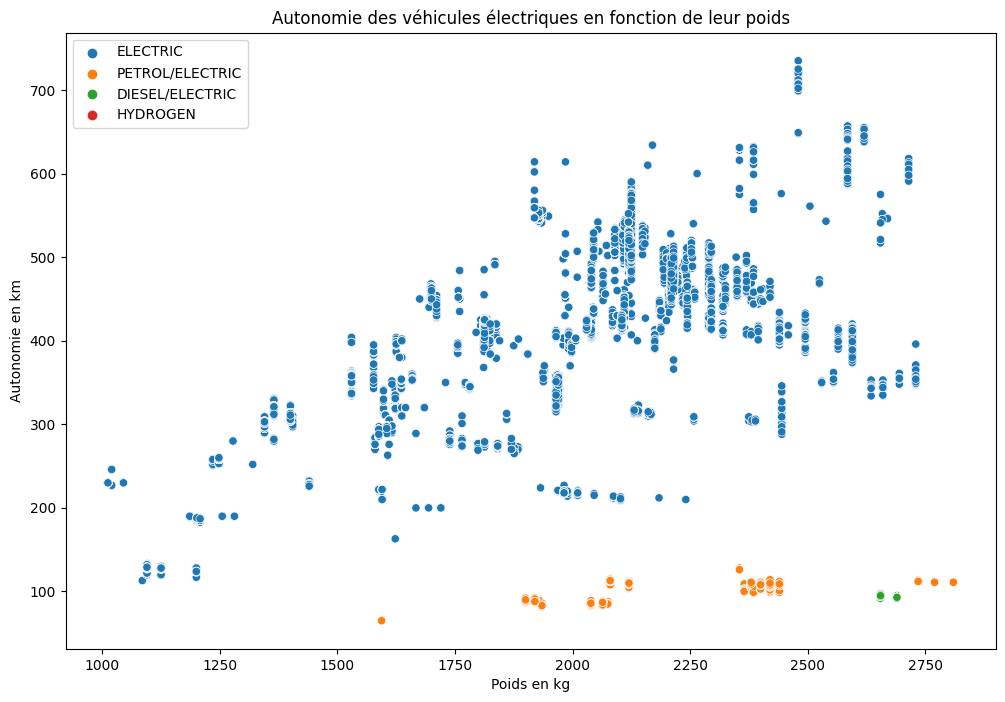

In [6]:
# Autonomie des véhicules électriques en fonction de leur poids 
plt.figure(figsize=(12,8))
sns.scatterplot(data=df, x='m (kg)', y = 'Electric range (km)', hue = 'Ft')
plt.xlabel('Poids en kg')
plt.ylabel('Autonomie en km')
plt.legend()
plt.title('Autonomie des véhicules électriques en fonction de leur poids')
plt.show()

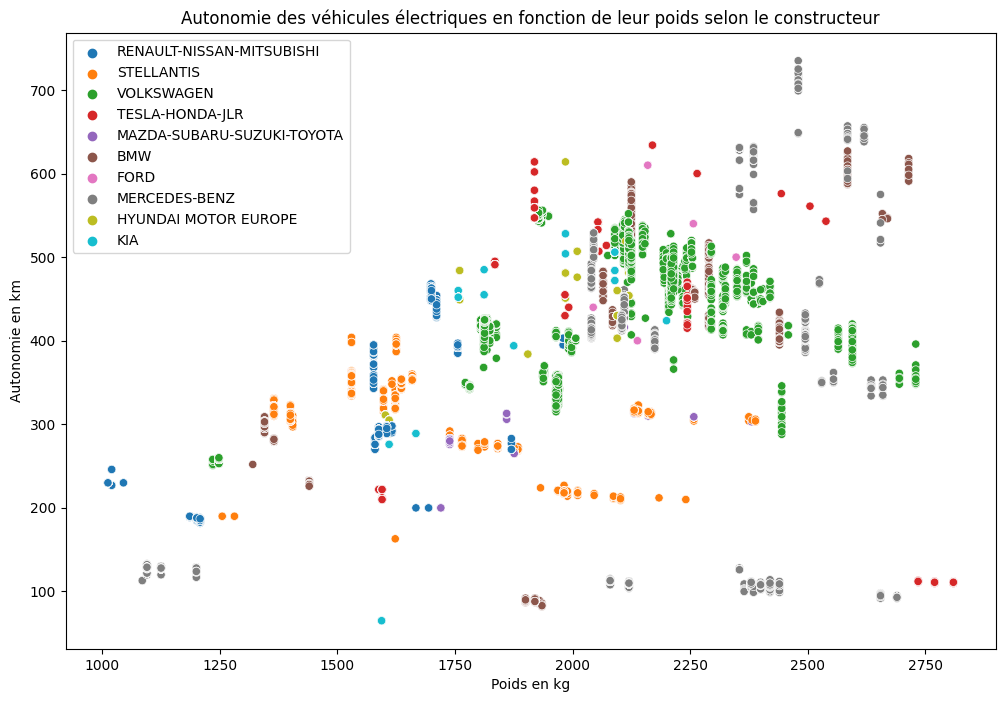

In [7]:
# Autonomie des véhicules électriques en fonction de leur poids selon le constructeur
plt.figure(figsize=(12,8))
sns.scatterplot(data=df, x='m (kg)', y = 'Electric range (km)', hue = 'Mp')
plt.xlabel('Poids en kg')
plt.ylabel('Autonomie en km')
plt.title('Autonomie des véhicules électriques en fonction de leur poids selon le constructeur')
plt.legend()
plt.show()

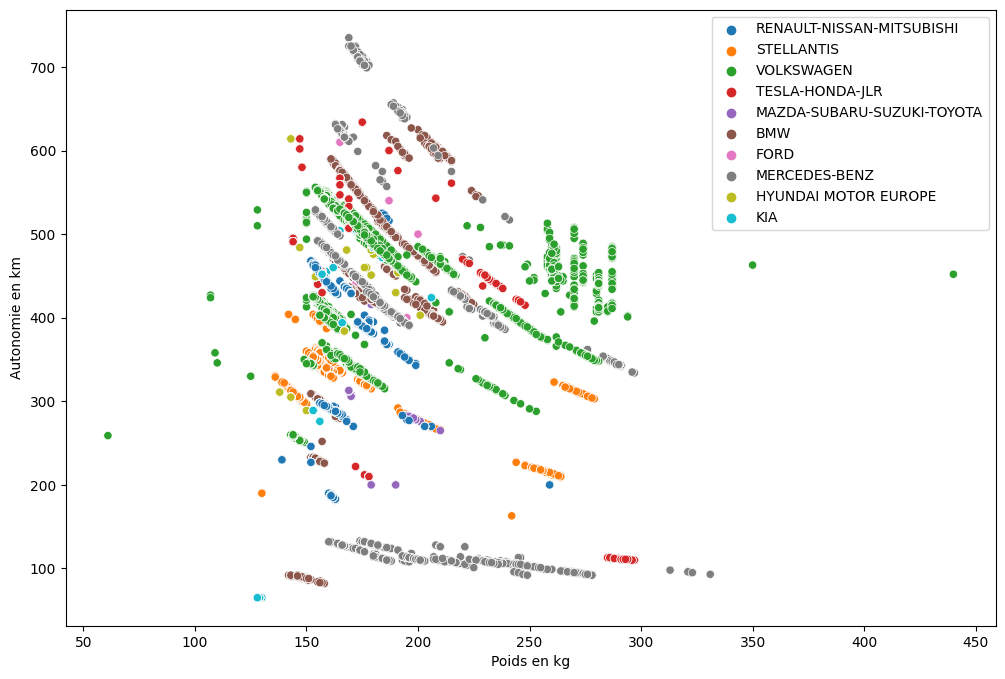

In [48]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df, x='z (Wh/km)', y = 'Electric range (km)', hue = 'Mp')
plt.xlabel('Poids en kg')
plt.ylabel('Autonomie en km')
plt.legend()
plt.show()

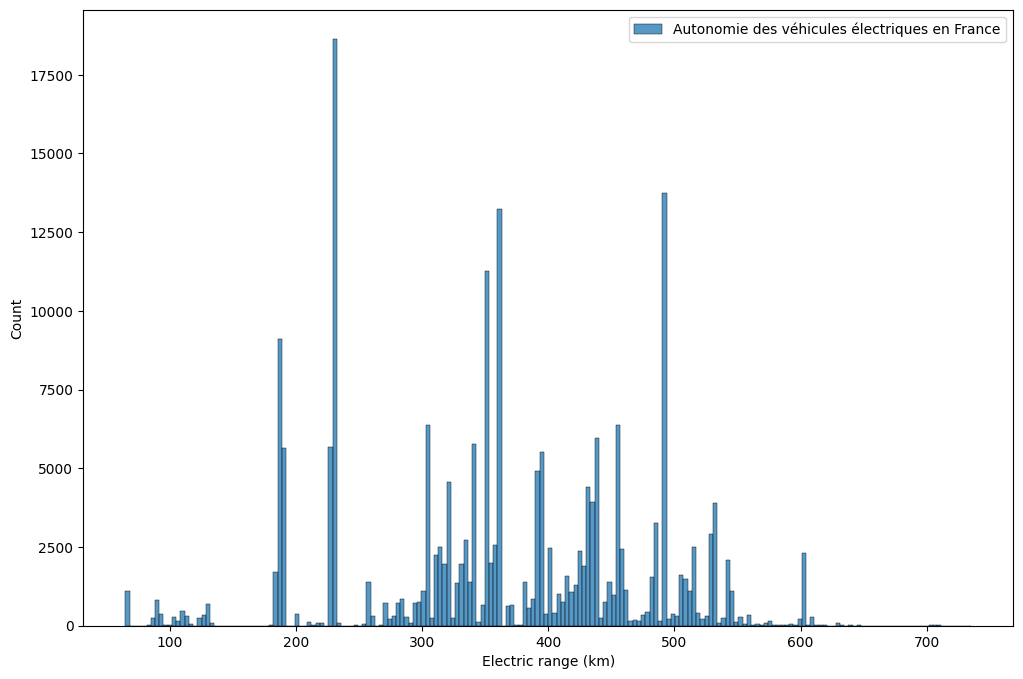

In [8]:
# Comparons l'autonomie des véhicules 
plt.figure(figsize=(12,8))
sns.histplot(data=df, x='Electric range (km)', bins = 200, label = 'Autonomie des véhicules électriques en France')
plt.legend()
plt.show()

## Projection de ventes de voitures électriques 

Source : https://www.iea.org/data-and-statistics/data-tools/global-ev-data-explorer

In [4]:
os.chdir("/Users/augustincablant/Documents/GitHub/Pycar")
df = pd.read_csv('DOWNLOAD/IEA-EV-dataEV salesProjection-STEPSCars.csv')
df.head()

,region,category,parameter,mode,powertrain,year,unit,value
0,China,Projection-STEPS,Oil displacement Mbd,Cars,EV,2020,Milion barrels per day,0.046
1,China,Projection-STEPS,"Oil displacement, million lge",Cars,EV,2020,"Oil displacement, million lge",2800.000
2,China,Projection-STEPS,EV stock share,Cars,EV,2020,percent,1.800
3,China,Projection-STEPS,Electricity demand,Cars,EV,2020,GWh,13000.000
4,China,Projection-STEPS,EV sales share,Cars,EV,2020,percent,5.800


In [5]:
df['year'].unique()

array([2020, 2021, 2022, 2025, 2030])

In [6]:
df['region'].unique()

array(['China', 'Europe', 'India', 'Rest of the world', 'USA', 'World'],
      dtype=object)

In [9]:
df['parameter'].unique()

array(['Oil displacement Mbd', 'Oil displacement, million lge',
       'EV stock share', 'Electricity demand', 'EV sales share',
       'EV stock', 'EV sales'], dtype=object)

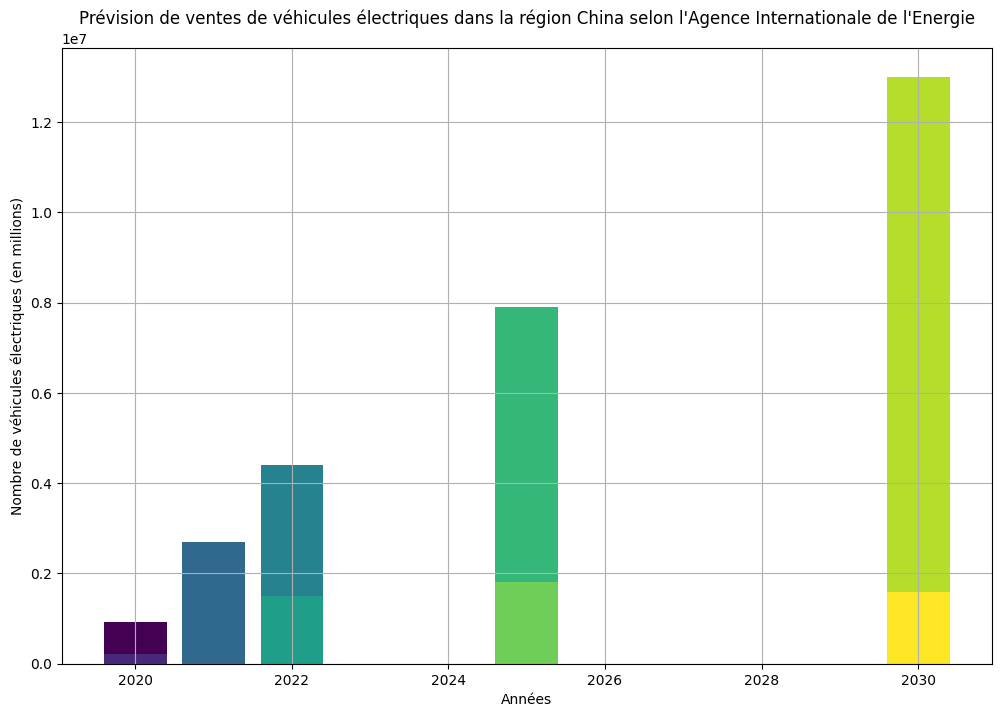

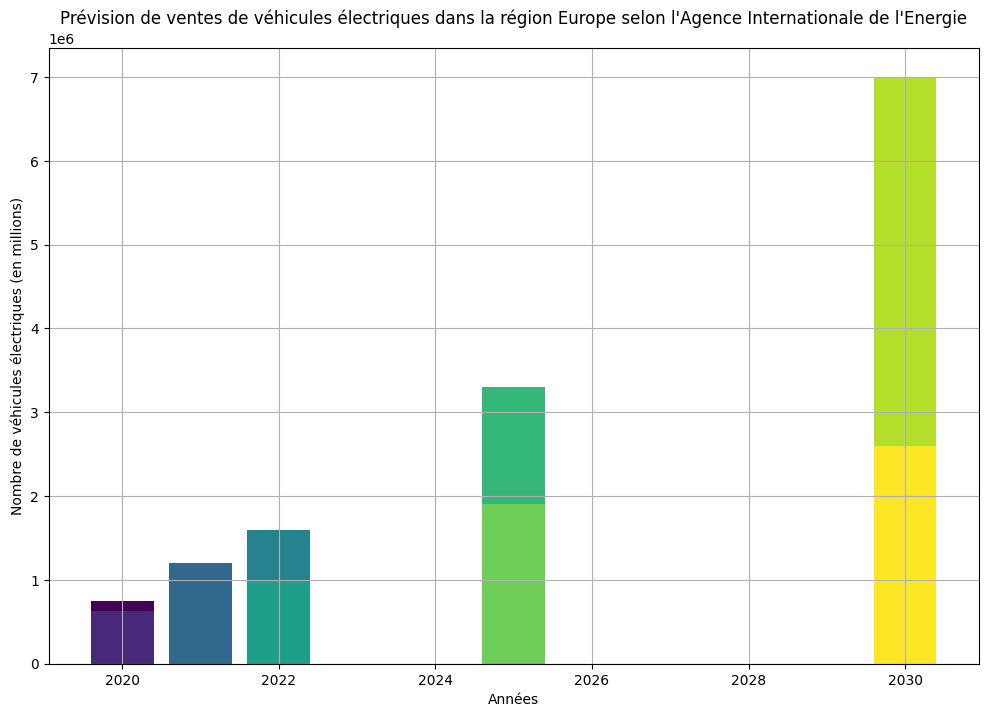

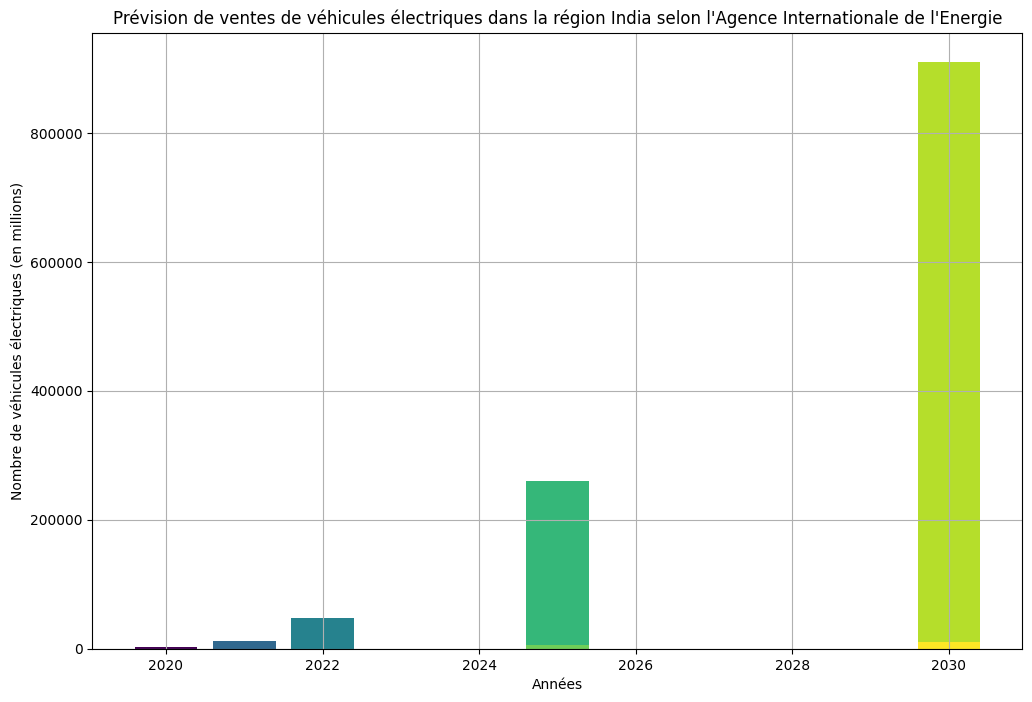

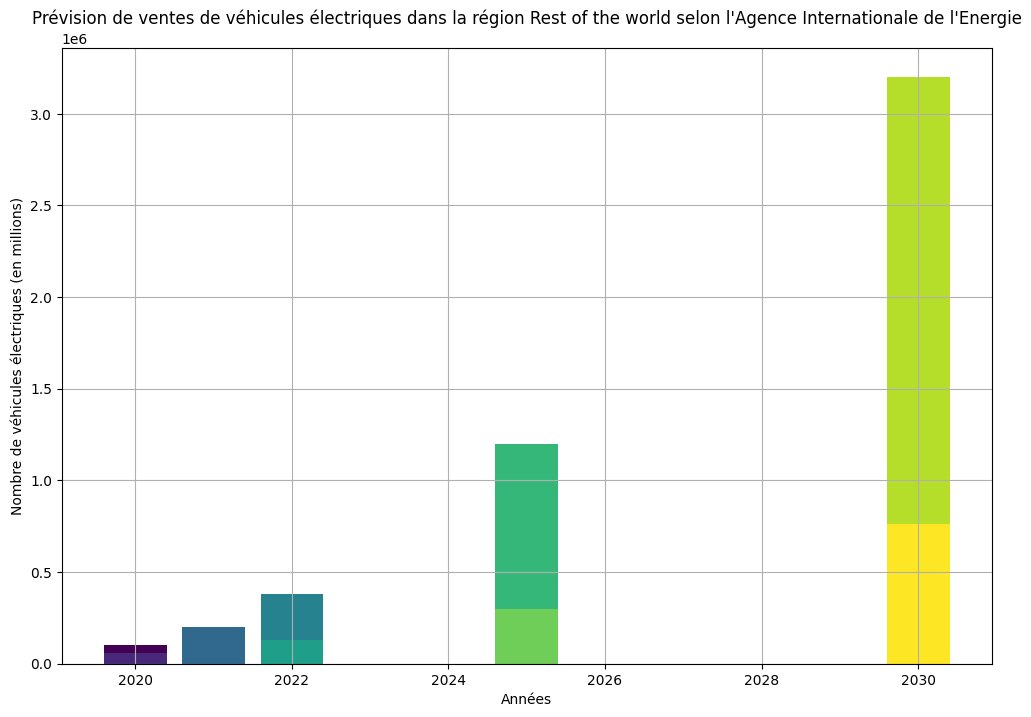

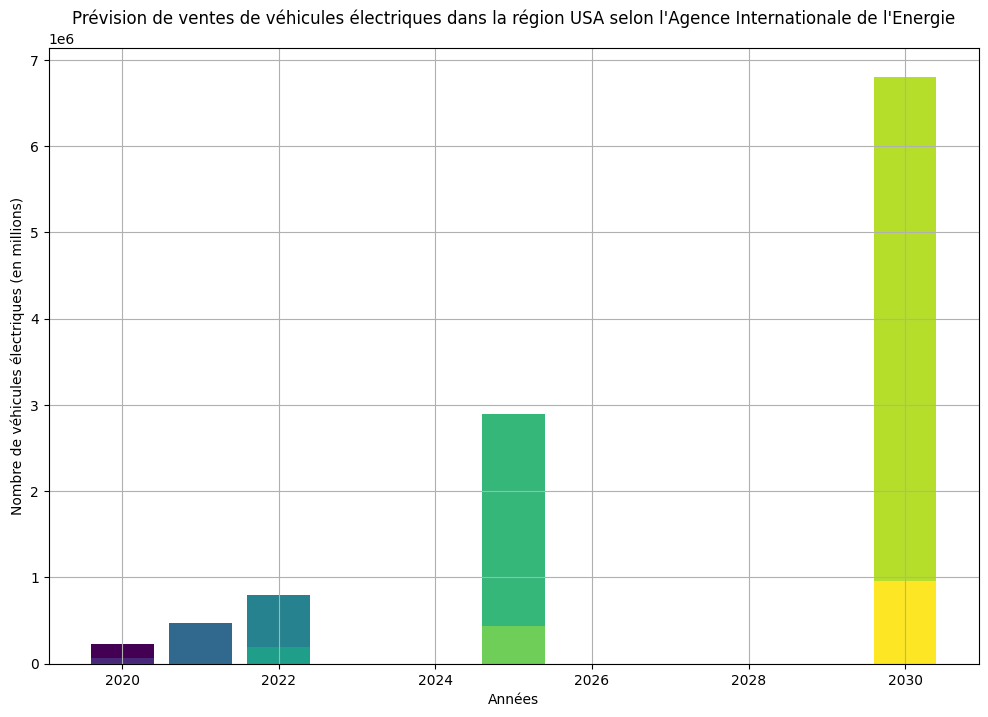

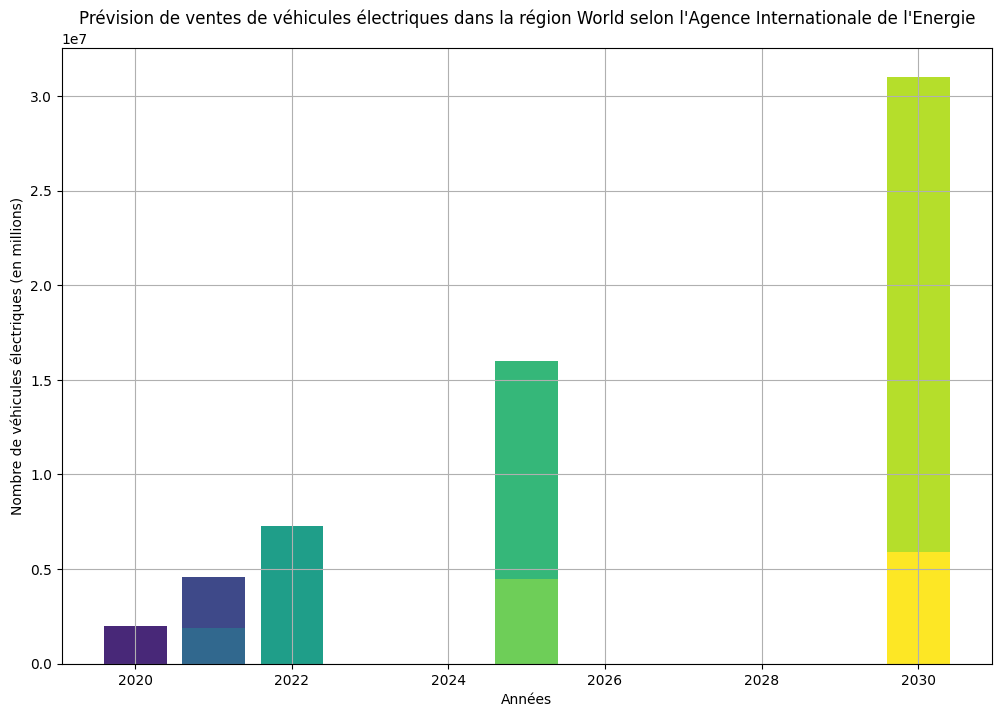

In [24]:
for region in list(df['region'].unique()):
    colors = plt.cm.viridis(np.linspace(0, 1, len(years)))
    IEA = "Agence Internationale de l'Energie"
    sub_df1 = df[df['region'] == region]
    sub_df = sub_df1[sub_df1['parameter'] == 'EV sales']
    years = sub_df['year'].to_list()
    values = sub_df['value'].to_list()
    plt.figure(figsize=(12,8))
    plt.bar(years, values, color = colors)
    plt.title(f"Prévision de ventes de véhicules électriques dans la région {region} selon l'{IEA}")
    plt.grid(True)
    plt.xlabel('Années')
    plt.ylabel("Nombre de véhicules électriques (en millions)")
    plt.show()


## Répartition de vente des véhicules en fonction de leur motorisation

In [8]:
os.chdir("/Users/augustincablant/Documents/GitHub/Pycar")
data_vehicles_2013_2021 = pd.read_csv('DOWNLOAD/data_vehicles_french_2013_2021.csv', low_memory=False).fillna(0)
data_vehicles_2013_2021.head()

,ID,Country,VFN,Mp,Mh,Man,MMS,Tan,T,Va,...,IT,Ernedc (g/km),Erwltp (g/km),De,Vf,Status,year,Date of registration,Fuel consumption,Electric range (km)
0,256235,GR,0,POOL RENAULT,RENAULT,RENAULT SAS,RENAULT,e2*2001/116*0327*37,R,BR1S,...,0,0.0,0.0,0.0,0.0,F,2013,0,0.0,0.0
1,256364,GR,0,POOL RENAULT,RENAULT,RENAULT SAS,RENAULT,e2*2001/116*0327*54,R,2R40,...,0,0.0,0.0,0.0,0.0,F,2013,0,0.0,0.0
2,256433,GR,0,POOL RENAULT,RENAULT,RENAULT SAS,RENAULT,e2*2001/116*0359*29,N,CNJ1,...,0,0.0,0.0,0.0,0.0,F,2013,0,0.0,0.0
3,256451,GR,0,POOL RENAULT,RENAULT,RENAULT SAS,RENAULT,e2*2001/116*0364*22,W,KW25,...,0,0.0,0.0,0.0,0.0,F,2013,0,0.0,0.0
4,256453,GR,0,POOL RENAULT,RENAULT,RENAULT SAS,RENAULT,e2*2001/116*0373*25,Z,BZ1V,...,0,0.0,0.0,0.0,0.0,F,2013,0,0.0,0.0


In [9]:
repartitionvehiculesneufs = pd.read_excel('DOWNLOAD/sect-ind-auto-immat-energie.xlsx',header=3,)
repartitionvehiculesneufs = repartitionvehiculesneufs.loc[[0,1,2,3,4,5],:]
repartitionvehiculesneufs_2015_2021=repartitionvehiculesneufs[["Type d'énergie",2015,2021]]
repartitionvehiculesneufs_2015_2021.head()

,Type d'énergie,2015,2021
0,Essence,739.374,669.928
1,Diesel,1097.122,349.479
2,Hybride1,61.617,430.899
3,Électricité,17.268,162.106
4,Bicarburation (essence + GPL + GNV),1.553,46.422


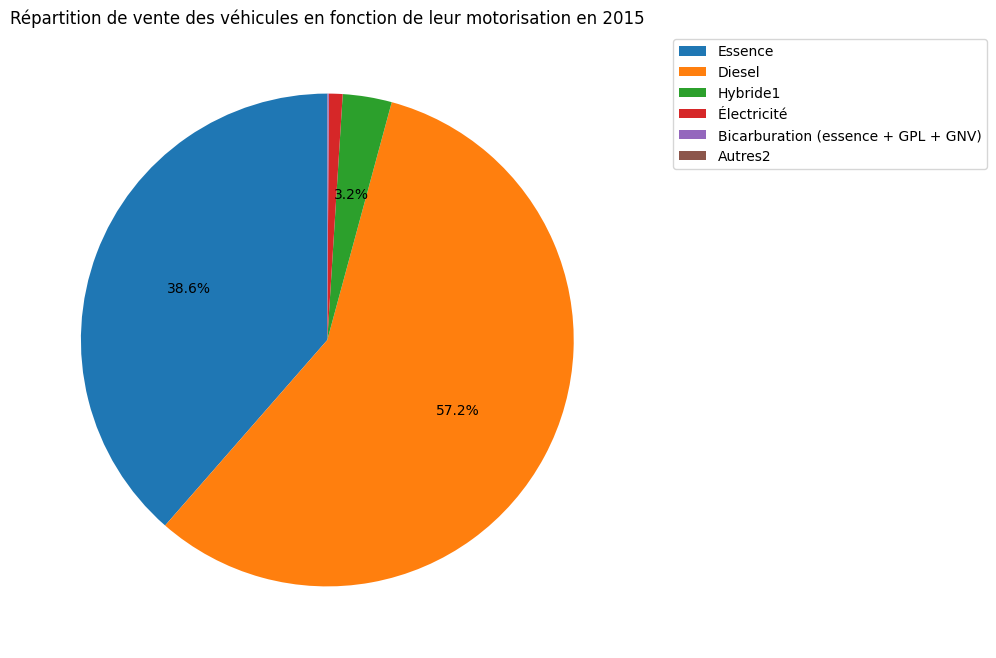

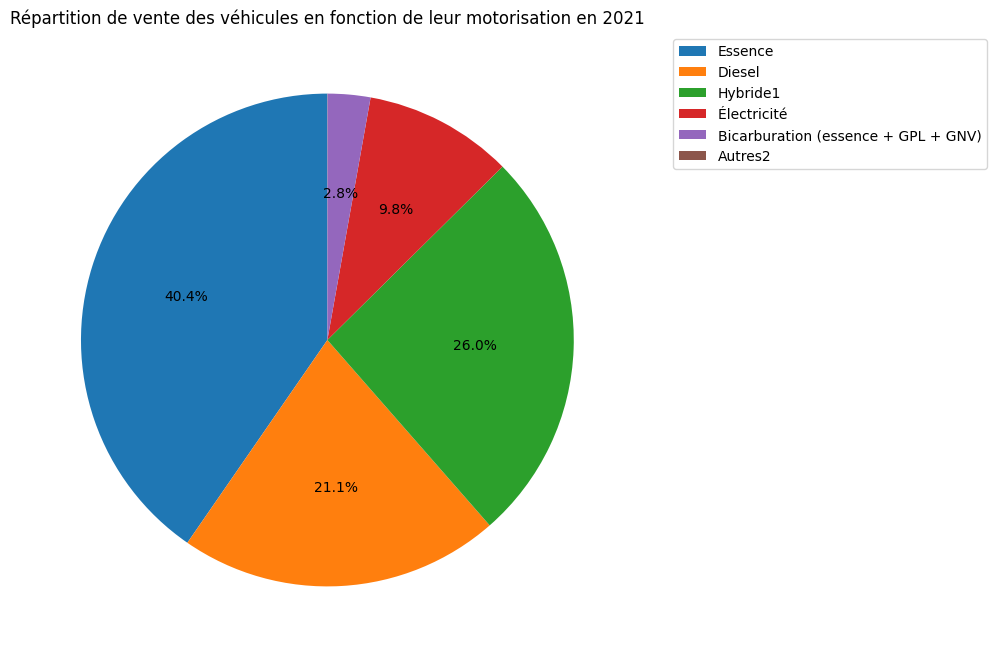

In [13]:
#Répartition de vente des véhicules en fonction de leur motorisation

year=[2015,2021]
for i in year:
    seuil_importance = 1  
    plt.figure(figsize=(8,8))
    data=repartitionvehiculesneufs[["Type d'énergie",i]]
    plt.pie( data.loc[:,i], 
            labels= data.loc[:,"Type d'énergie"], 
            autopct=lambda p: '{:.1f}%'.format(p) if p > seuil_importance else '',
            startangle=90, 
            labeldistance=None)
    val_legende=data.loc[:,i]/(sum(data.loc[:,i]))
    plt.legend(bbox_to_anchor=(1.05, 1))
    plt.title('Répartition de vente des véhicules en fonction de leur motorisation en {}'.format(i))
    plt.show()

In [14]:
data_vehicles_2013_2021.columns

Index(['ID', 'Country', 'VFN', 'Mp', 'Mh', 'Man', 'MMS', 'Tan', 'T', 'Va',
       'Ve', 'Mk', 'Cn', 'Ct', 'Cr', 'r', 'm (kg)', 'Mt', 'Enedc (g/km)',
       'Ewltp (g/km)', 'W (mm)', 'At1 (mm)', 'At2 (mm)', 'Ft', 'Fm',
       'ec (cm3)', 'ep (KW)', 'z (Wh/km)', 'IT', 'Ernedc (g/km)',
       'Erwltp (g/km)', 'De', 'Vf', 'Status', 'year', 'Date of registration',
       'Fuel consumption ', 'Electric range (km)'],
      dtype='object')

In [15]:
#on garde seulement les colonnes qui nous intéressent
data_vehicles_final=data_vehicles_2013_2021.loc[:,['Mh','Cn','year','Ft','m (kg)','Enedc (g/km)','Ewltp (g/km)','Electric range (km)','Fuel consumption ']].drop_duplicates(subset='Cn',keep='first').sort_values('year',ascending=True) 
#on reshape les data (pour uniformiser les catégories)
data_vehicles_final = data_vehicles_final[data_vehicles_final['Mh']!='PSA']
data_vehicles_final = data_vehicles_final[data_vehicles_final['Ft']!=0]
data_vehicles_final['Ft']=data_vehicles_final['Ft'].apply(lambda x : x.lower())

data_vehicles_final.head(-10)

,Mh,Cn,year,Ft,m (kg),Enedc (g/km),Ewltp (g/km),Electric range (km),Fuel consumption
0,RENAULT,CLIO,2013,petrol,1062.0,135.0,0.0,0.0,0.0
947,AUTOMOBILES CITROEN,DS4 / 1.6 / HDI AUT.,2013,diesel,1375.0,114.0,0.0,0.0,0.0
946,AUTOMOBILES CITROEN,DS4 / 1.6 / HDI,2013,diesel,1370.0,113.0,0.0,0.0,0.0
945,AUTOMOBILES CITROEN,DS3 RACING / 1.6 / 16V TURBO,2013,petrol,1240.0,149.0,0.0,0.0,0.0
944,AUTOMOBILES CITROEN,DS3 / 1.6 / 16V TURBO,2013,petrol,1165.0,135.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
1593,AUTOMOBILES CITROEN,JUMPY SPACE TOURER / 2.0 / HDI L2,2021,diesel,1793.0,0.0,183.0,0.0,7.0
1592,AUTOMOBILES CITROEN,JUMPY SPACE TOURER / 2.0 / AUT.HDI L2,2021,diesel,1839.0,0.0,186.0,0.0,7.1
1591,AUTOMOBILES CITROEN,JUMPY SPACE TOURER / 1.5 / HDI L2,2021,diesel,1734.0,0.0,167.0,0.0,6.4
1584,AUTOMOBILES CITROEN,C4 SPACETOURER / 2.0 / HDI AUT.,2021,diesel,1615.0,0.0,160.0,0.0,6.1


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


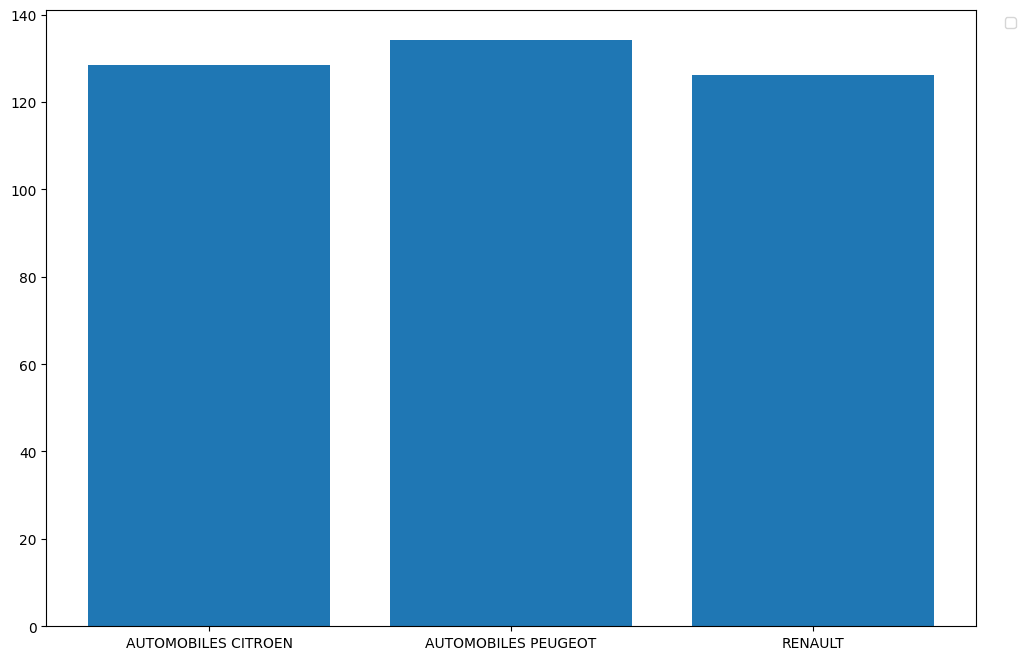

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


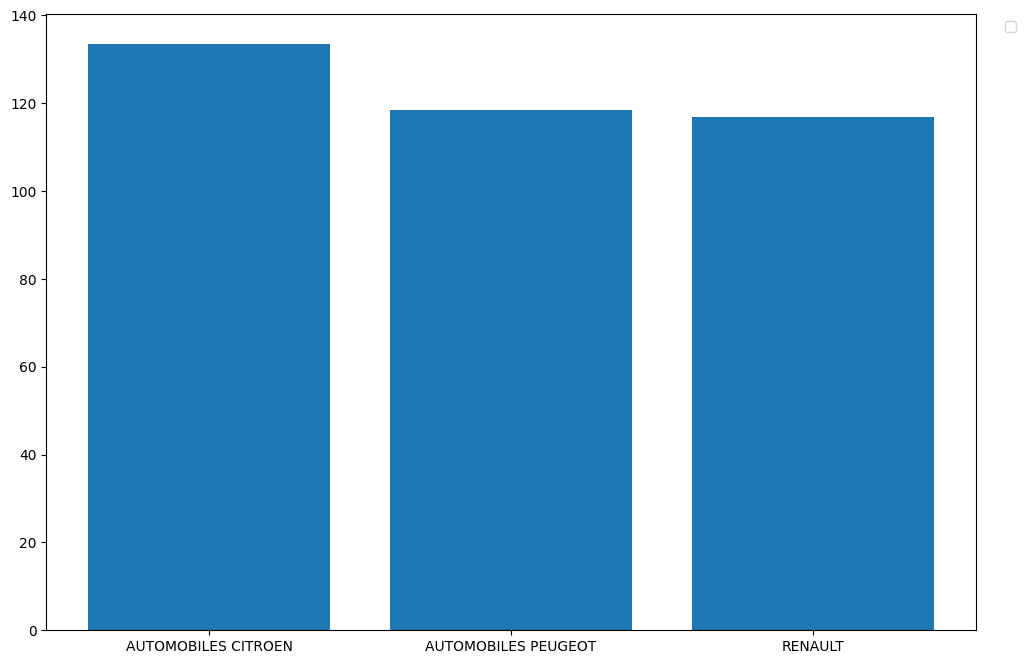

In [16]:
data_vehicles_constr = data_vehicles_final.loc[:,['Mh','year','Enedc (g/km)', 'Ewltp (g/km)']].groupby(['year','Mh'])
data_emission_mean = data_vehicles_constr.mean() #on construit le dataframe de la valeur moyenne des émissions
constr=list(set(data_vehicles_final['Mh'])) #on récupère la liste des constructeurs
year=[2013,2021]
for i in range(len(year)):
    data_emission=data_emission_mean.loc[data_emission_mean.index[[3*i,3*i+1,3*i+2]]]
    if i==0:
        values='Enedc (g/km)' #type de controle qui a changé
    elif i==1:
        values = 'Ewltp (g/km)' #type de controle qui a changé
    plt.figure(figsize=(12,8))
    plt.bar(constr, data_emission[values])
    plt.legend(bbox_to_anchor=(1.05, 1))
    plt.show()

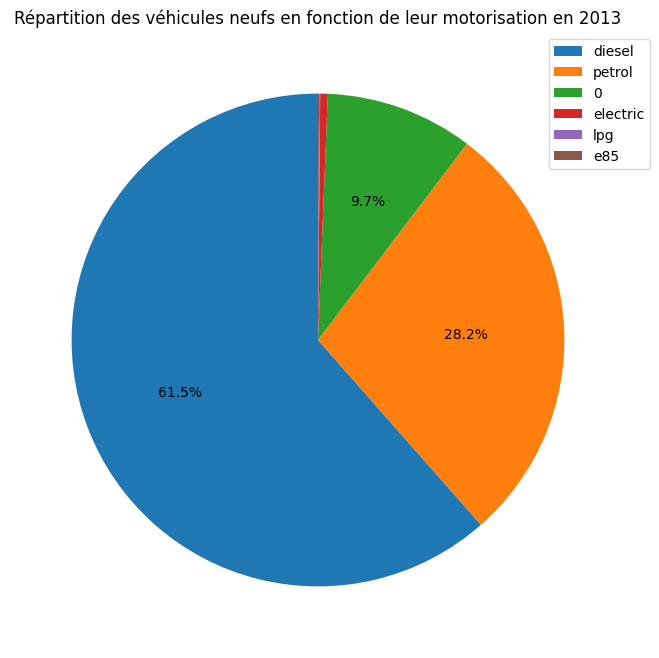

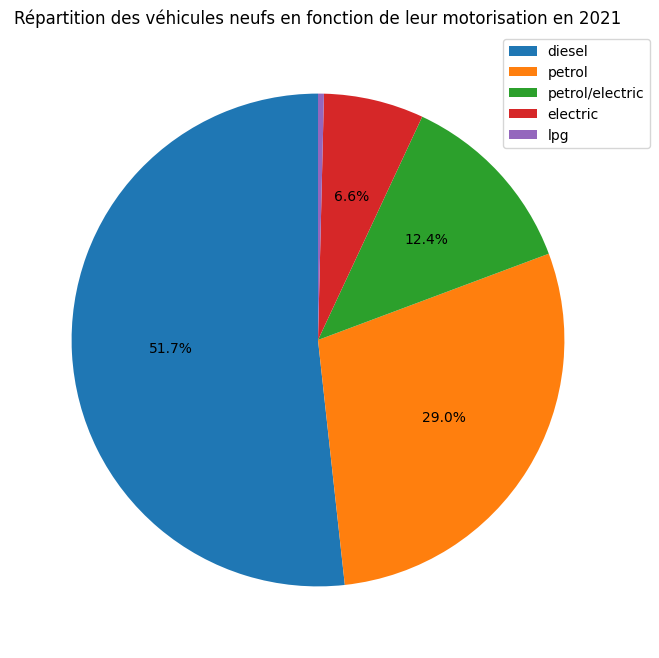

In [17]:
#affichage de la répartition des véhicules neufs dévéloppés par les constructeurs français

year=[2013,2021]
for i in range(len(year)):
    data=data_vehicles_final[data_vehicles_final["year"]==year[i]]
    compt_ft=data['Ft'].value_counts()
    plt.figure(figsize=(8,8))
    plt.pie(compt_ft.values, 
            labels=compt_ft.index, 
            autopct=lambda p: '{:.1f}%'.format(p) if p > seuil_importance else '',
            startangle=90,
            labeldistance=None)
    plt.legend(bbox_to_anchor=(1.05, 1))
    plt.title('Répartition des véhicules neufs en fonction de leur motorisation en {}'.format(year[i]))
    plt.show()